In [3]:
# Reading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
!pip install dmba
from dmba import plotDecisionTree
from sklearn.tree import DecisionTreeClassifier
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Reading dataset
data=pd.read_csv('pre_eda_data.csv')

In [5]:
# Dropping additional index
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Original shape
data.shape

(10422, 124)

0. DEFINING GROUPS OF VARIABLES

In [7]:
# Weight variable (1):
weight=['PWEIGHT']

In [8]:
# Total integer variables (47)
int_data=['PATTCRLM','PATTLMLC','PEFATINC','PEFGTR','IMP_PEFMTINC','PFCRN','IMP_PINHERT','PWAOTPEN',
'PWARPPT','PWARRIF','PWARRSPL','PWASTBND','PWASTDEP','PWASTMUI','PWASTOIN','PWASTONF','PWASTSTK',
'PWASTVHE','PWATFS','PWATOTPT','PWBUSEQ','PWDSLOAN','PWDSTCRD','PWDSTLOC','PWDSTODB','PWDSTVHN','PWDTOTAL',
'PWNETWPT','PASRBUYG','PASRCNMG','IMP_PASRCST','PASRDWNG','PASRFNMG','PWAPRVAL','PWASTRST','IMP_PASR1MFA','PASRCURG','PASRINTG','PASRMOAG','PASRMPFG','PASRMRYG','IMP_PEXMG1A',
'PEXMG1F','PWDPRMOR','PWDSTOMR','PAGEMIEG','PFSZ']

In [9]:
# Count of items in the integer data list
len(int_data)

47

In [10]:
# Total categorical variables (75)
cat_data=['PATTCRC','PATTCRR','PATTCRU','D_PATTCRU','PATTDIF','PATTLCP','PATTLCR','PATTPAYD','PATTRSA',
'PATTRSH','PATTRSL','PATTRSP','PATTRSR','PATTSTIN','PBUSIND','D_PEFATINC','D1_PEFGTR','D2_PEFGTR','PEFMJSIF',
'D_PEFMTINC','PFRSPST','D_PINHERT','PNBEARG','D_PWAOTPEN','D_PWARPPT','D_PWARRIF','D_PWARRSPL','D_PWASTBND',
'D_PWASTDEP','D_PWASTMUI','D_PWASTOIN','D_PWASTONF','D_PWASTSTK','D_PWASTVHE','D_PWATFS','D_PWATOTPT','D_PWDSLOAN',
'D_PWDSTODB','D_PWDSTVHN','D_PWDTOTAL','D1_PWNETWPT','D2_PWNETWPT','D_PASRBUYG','D_PASRCNMG','PASRCON','PASRDPO1','PASRDPO2','PASRDPO3','PASRDPO4','PASRDPO5',
'D_PASRFNMG','PASRRNTG','PDWTYP','PFTENUR','D_PFTENUR','D_PAS1MRAG','D_PASR1MFA','PASR1MR','D_PASR1MR','PASRINT','PASRSKP',
'PEDUCMIE','PFMTYPG','PFSZ0017','PFSZ1824','PFSZ2544','PFSZ4564','PFSZ65UP',
'PLFCHRME','PLFFPTME','PLFPDMEG','PRETIRME','PGDRMIE','PPVRES','PREGION']

In [11]:
# Count of items in the categorical data list
len(cat_data)

75

In [12]:
# Target variable: 
target=['PATTSKP']

1. Resources Assets, Business, Credit & Credit Card, Debt, Funds, Income, Net Worth, RRSP(70)

In [13]:
# Resources variables - 70
resources_data=['PATTCRLM','PATTLMLC','PEFATINC','PEFGTR','IMP_PEFMTINC','PFCRN','IMP_PINHERT','PWAOTPEN',
'PWARPPT','PWARRIF','PWARRSPL','PWASTBND','PWASTDEP','PWASTMUI','PWASTOIN','PWASTONF','PWASTSTK',
'PWASTVHE','PWATFS','PWATOTPT','PWBUSEQ','PWDSLOAN','PWDSTCRD','PWDSTLOC','PWDSTODB','PWDSTVHN','PWDTOTAL',
'PWNETWPT','PATTCRC','PATTCRR','PATTCRU','D_PATTCRU','PATTDIF','PATTLCP','PATTLCR','PATTPAYD','PATTRSA',
'PATTRSH','PATTRSL','PATTRSP','PATTRSR','PATTSTIN','PBUSIND','D_PEFATINC','D1_PEFGTR','D2_PEFGTR','PEFMJSIF',
'D_PEFMTINC','PFRSPST','D_PINHERT','PNBEARG','D_PWAOTPEN','D_PWARPPT','D_PWARRIF','D_PWARRSPL','D_PWASTBND',
'D_PWASTDEP','D_PWASTMUI','D_PWASTOIN','D_PWASTONF','D_PWASTSTK','D_PWASTVHE','D_PWATFS','D_PWATOTPT','D_PWDSLOAN',
'D_PWDSTODB','D_PWDSTVHN','D_PWDTOTAL','D1_PWNETWPT','D2_PWNETWPT']

In [14]:
# Count of items in the resources categorical data list
len(resources_data)

70

In [15]:
# Resoures integer variables
res_int_data=['PATTCRLM','PATTLMLC','PEFATINC','PEFGTR','IMP_PEFMTINC','PFCRN','IMP_PINHERT','PWAOTPEN',
'PWARPPT','PWARRIF','PWARRSPL','PWASTBND','PWASTDEP','PWASTMUI','PWASTOIN','PWASTONF','PWASTSTK',
'PWASTVHE','PWATFS','PWATOTPT','PWBUSEQ','PWDSLOAN','PWDSTCRD','PWDSTLOC','PWDSTODB','PWDSTVHN','PWDTOTAL',
'PWNETWPT']

In [16]:
# Count of items in the resources integer data list
len(res_int_data)

28

In [17]:
# Resources categorical variables
res_cat_data=['PATTCRC','PATTCRR','PATTCRU','D_PATTCRU','PATTDIF','PATTLCP','PATTLCR','PATTPAYD','PATTRSA',
'PATTRSH','PATTRSL','PATTRSP','PATTRSR','PATTSTIN','PBUSIND','D_PEFATINC','D1_PEFGTR','D2_PEFGTR','PEFMJSIF',
'D_PEFMTINC','PFRSPST','D_PINHERT','PNBEARG','D_PWAOTPEN','D_PWARPPT','D_PWARRIF','D_PWARRSPL','D_PWASTBND',
'D_PWASTDEP','D_PWASTMUI','D_PWASTOIN','D_PWASTONF','D_PWASTSTK','D_PWASTVHE','D_PWATFS','D_PWATOTPT','D_PWDSLOAN',
'D_PWDSTODB','D_PWDSTVHN','D_PWDTOTAL','D1_PWNETWPT','D2_PWNETWPT']

In [18]:
# Count of items in the resources categorical data list
len(res_cat_data)

42

2. Real Estate (20)

In [19]:
# Real estate variables
realestate_data=['PASRBUYG','PASRCNMG','IMP_PASRCST','PASRDWNG','PASRFNMG','PWAPRVAL','PWASTRST','D_PASRBUYG','D_PASRCNMG','PASRCON','PASRDPO1','PASRDPO2','PASRDPO3','PASRDPO4','PASRDPO5',
'D_PASRFNMG','PASRRNTG','PDWTYP','PFTENUR','D_PFTENUR']

In [20]:
# Count of items in the real estate data list
len(realestate_data)

20

In [21]:
# Real estate integer variables
rea_int_data=['PASRBUYG','PASRCNMG','IMP_PASRCST','PASRDWNG','PASRFNMG','PWAPRVAL','PWASTRST']

In [22]:
# Count of items in the real estate integer data list
len(rea_int_data)

7

In [23]:
# Real estate categorical variables
rea_cat_data=['D_PASRBUYG','D_PASRCNMG','PASRCON','PASRDPO1','PASRDPO2','PASRDPO3','PASRDPO4','PASRDPO5',
'D_PASRFNMG','PASRRNTG','PDWTYP','PFTENUR','D_PFTENUR']

In [24]:
# Count of items in the real estate categorical data list
len(rea_cat_data)

13

3. Mortgage (16)

In [25]:
# Mortgage variables
mortgage_data=['IMP_PASR1MFA','PASRCURG','PASRINTG','PASRMOAG','PASRMPFG','PASRMRYG','IMP_PEXMG1A',
'PEXMG1F','PWDPRMOR','PWDSTOMR','D_PAS1MRAG','D_PASR1MFA','PASR1MR','D_PASR1MR','PASRINT','PASRSKP']

In [26]:
# Count of items in the mortgage data list
len(mortgage_data)

16

In [27]:
# Mortgage integer variables
mor_int_data=['IMP_PASR1MFA','PASRCURG','PASRINTG','PASRMOAG','PASRMPFG','PASRMRYG','IMP_PEXMG1A',
'PEXMG1F','PWDPRMOR','PWDSTOMR']

In [28]:
# Count of items in the mortgage integer data list
len(mor_int_data)

10

In [29]:
# Mortgage categorical variables
mor_cat_data=['D_PAS1MRAG','D_PASR1MFA','PASR1MR','D_PASR1MR','PASRINT','PASRSKP']

In [30]:
# Count of items in the mortgage categorical data list
len(mor_cat_data)

6

4. Family Composition (16)

In [31]:
# Family variables
family_data=['PAGEMIEG','PFSZ','PEDUCMIE','PFMTYPG','PFSZ0017','PFSZ1824','PFSZ2544','PFSZ4564','PFSZ65UP',
'PLFCHRME','PLFFPTME','PLFPDMEG','PRETIRME','PGDRMIE','PPVRES','PREGION']

In [32]:
# Count of items in the family composition data list
len(family_data)

16

In [33]:
# Family integer variables
fam_int_data=['PAGEMIEG','PFSZ']

In [34]:
# Count of items in the family composition data list
len(fam_int_data)

2

In [35]:
# Family categorical variables
fam_cat_data=['PEDUCMIE','PFMTYPG','PFSZ0017','PFSZ1824','PFSZ2544','PFSZ4564','PFSZ65UP',
'PLFCHRME','PLFFPTME','PLFPDMEG','PRETIRME','PGDRMIE','PPVRES','PREGION']

In [36]:
# Count of items in the family composition data list
len(fam_cat_data)

14

1. INITIAL DESCRIPTIVE STATISTICS

In [37]:
# 1. Initial descriptive statistics for integer data
pre_eda_int_data_stats=pd.DataFrame({
'std dev':(data[int_data].std(axis=0)).round(2),
'mean':(data[int_data].mean(axis=0)).round(2),
'min':(data[int_data].min(axis=0)).round(),
'max':data[int_data].max(axis=0),
'skew':(data[int_data].skew(axis=0)).round(2),
'kurtosis':(data[int_data].kurtosis(axis=0)).round(2),
'null values':data[int_data].isnull().sum()}, )
pre_eda_int_data_stats.sort_values(by=['skew'], ascending=False)

,std dev,mean,min,max,skew,kurtosis,null values
PWASTSTK,429036.85,39434.71,1.0,16250000.0,25.93,842.01,0
PWASTBND,34303.47,2049.53,0.0,1100000.0,24.82,687.50,0
PWASTOIN,124658.80,13665.23,0.0,4600000.0,24.51,759.31,0
PWASTMUI,442391.02,49345.34,0.0,15750000.0,22.86,687.79,0
PWARRIF,197212.37,29524.19,0.0,7250000.0,21.44,657.24,0
PWDSTODB,16624.55,1806.94,0.0,500000.0,20.04,490.55,0
PWAOTPEN,42875.86,4337.22,0.0,1300000.0,18.11,405.17,0
PWASTRST,529246.43,108198.70,0.0,17250000.0,17.12,452.12,0
IMP_PASR1MFA,6400.61,1006.60,0.0,140000.0,11.47,172.30,0
IMP_PEXMG1A,940.41,367.61,0.0,24000.0,10.74,199.06,0


In [38]:
# 1. Initial descriptive statistics for categorical data

pre_eda_cat_data=pd.DataFrame({
'median':(data[cat_data].median(axis=0)).round(2),
'mode':data[cat_data].value_counts().idxmax(),
'min':(data[cat_data].min(axis=0)).round(),
'max':data[cat_data].max(axis=0),
'null values':data[cat_data].isnull().sum()},index=cat_data)

# Creating the 'Percentage Mode','Percentage least common value', and 'Count'
cols=['% - mode','% - least common value','number of classes']
lst=[]
for i in data[cat_data]:
    percentage=(data[i].value_counts(normalize=True)).max()*100
    percentage2=(data[i].value_counts(normalize=True)).min()*100
    count=(data[i].value_counts()).count()
    lst.append([percentage,percentage2,count])
class_dist=pd.DataFrame(lst, columns=cols, index=cat_data)

pre_eda_cat_data_stats=pd.concat([pre_eda_cat_data,class_dist], axis=1)

pre_eda_cat_data_stats['% - mode']=(pre_eda_cat_data_stats['% - mode']).round(2)
pre_eda_cat_data_stats['% - least common value']=(pre_eda_cat_data_stats['% - least common value']).round(2)
#pre_eda_cat_data_stats['% - mode']=pre_eda_cat_data_stats['% - mode'].astype('int64')
#pre_eda_cat_data_stats['% - least common value']=pre_eda_cat_data_stats['% - least common value'].astype('int64')

pre_eda_cat_data_stats.sort_values(by=['% - mode'], ascending=False).head(50)

,median,mode,min,max,null values,% - mode,% - least common value,number of classes
D_PWASTONF,1.0,1,1,1,0,100.00,100.00,1
D_PAS1MRAG,0.0,0,0,1,0,97.74,2.26,2
PATTPAYD,2.0,2,1,2,0,97.62,2.38,2
D_PWASTBND,0.0,0,0,1,0,97.14,2.86,2
D1_PWNETWPT,0.0,0,0,1,0,95.38,4.62,2
D_PASRFNMG,0.0,0,0,1,0,94.77,5.23,2
D_PWASTDEP,1.0,1,0,1,0,94.67,5.33,2
D_PWAOTPEN,0.0,0,0,1,0,93.48,6.52,2
PATTDIF,6.0,6,1,6,0,93.11,2.25,3
D_PASR1MFA,0.0,0,0,1,0,91.75,8.25,2


In [39]:
# data types
#data[rea_cat_data]=data[rea_cat_data].astype('category')
#data[mor_cat_data]=data[mor_cat_data].astype('category')
#data[fam_cat_data]=data[fam_cat_data].astype('category')
#data[res_cat_data]=data[res_cat_data].astype('category')

DATA QUALITY

In [40]:
# Finding Integer Correlated Variables
correlation_matrix_int_data=data[int_data].corr(method='pearson')
lst=[]
cond=correlation_matrix_int_data>=0.7
for col in int_data:
    rows = list(cond[col][cond[col]==True].index)
    for row in rows:
        lst.append((row,col))
correlated=pd.DataFrame(lst, columns=['Variable 1','Variable 2'])
correlated2=correlated[correlated['Variable 1']!=correlated['Variable 2']]
correlated_unique=correlated2[~correlated2[['Variable 1','Variable 2']].apply(frozenset, axis=1).duplicated()]
correlated_unique.reset_index(drop=True, inplace=True)
correlated_unique.index+=1
correlated_unique.sort_values(by='Variable 1').inplace=True


lstv1=[]
lstv2=[]
lst1=correlated_unique['Variable 1'].tolist()
lst2=correlated_unique['Variable 2'].tolist()
for i in lst1:
    cor1=data[i].corr(data['PATTSKP'])
    skew1=pre_eda_int_data_stats.loc[i,'skew']
    lstv1.append([cor1,skew1])
var1cor=pd.DataFrame(lstv1, columns=['Var1-Target Corr','Skew Var 1'])
for j in lst2:
    cor2=data[j].corr(data['PATTSKP'])
    skew2=pre_eda_int_data_stats.loc[j,'skew']
    lstv2.append([cor2,skew2])
var2cor=pd.DataFrame(lstv2, columns=['Var2-Target Corr','Skew Var 2'])
varcor=pd.concat([var1cor,var2cor], axis=1)
varcor.set_index(correlated_unique.index,inplace=True)
integer_var_cor=pd.concat([correlated_unique,varcor],axis=1)



In [41]:
# First scan of integer variables with a Pearson correlation factor higher than 0.70
integer_var_cor

,Variable 1,Variable 2,Var1-Target Corr,Skew Var 1,Var2-Target Corr,Skew Var 2
1,IMP_PEFMTINC,PEFATINC,0.053063,9.18,0.060128,6.88
2,PWNETWPT,PWATOTPT,0.086922,5.73,0.084051,5.57
3,PWDPRMOR,PWDTOTAL,-0.005281,3.40,-0.004738,3.83
4,PWAPRVAL,IMP_PASRCST,0.086758,6.30,0.064792,4.08
5,PASRINTG,PASRCURG,-0.042689,0.87,-0.030667,1.20
6,PASRMOAG,PASRCURG,-0.034111,0.76,-0.030667,1.20
7,PASRMPFG,PASRCURG,-0.043524,1.07,-0.030667,1.20
8,PASRMRYG,PASRCURG,-0.024265,1.16,-0.030667,1.20
9,PEXMG1F,PASRCURG,-0.016794,1.15,-0.030667,1.20
10,PASRMOAG,PASRINTG,-0.034111,0.76,-0.042689,0.87


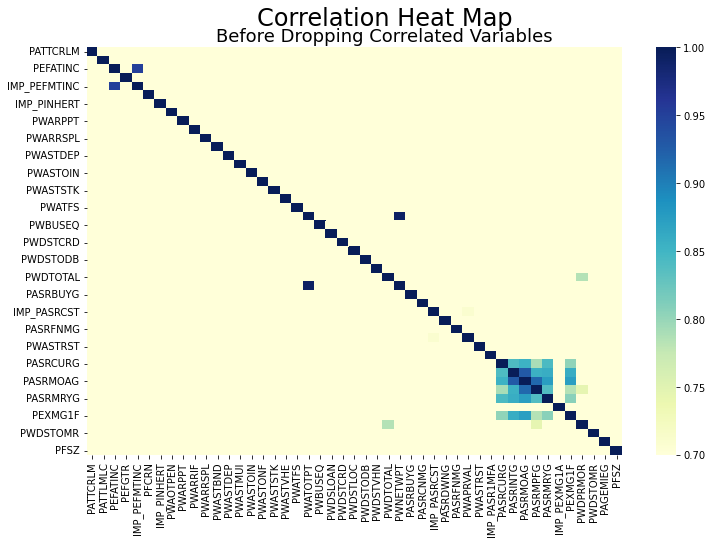

In [42]:
# Correlation Heat Map
fig=plt.figure(figsize = (12,7.5))
plt.text(x=0.47, y=0.92, s="Correlation Heat Map", fontsize=24, ha="center", transform=fig.transFigure)
plt.text(x=0.47, y=0.89, s= "Before Dropping Correlated Variables", fontsize=18, ha="center", transform=fig.transFigure)
sns.heatmap(correlation_matrix_int_data, vmin=0.7, cmap='YlGnBu')

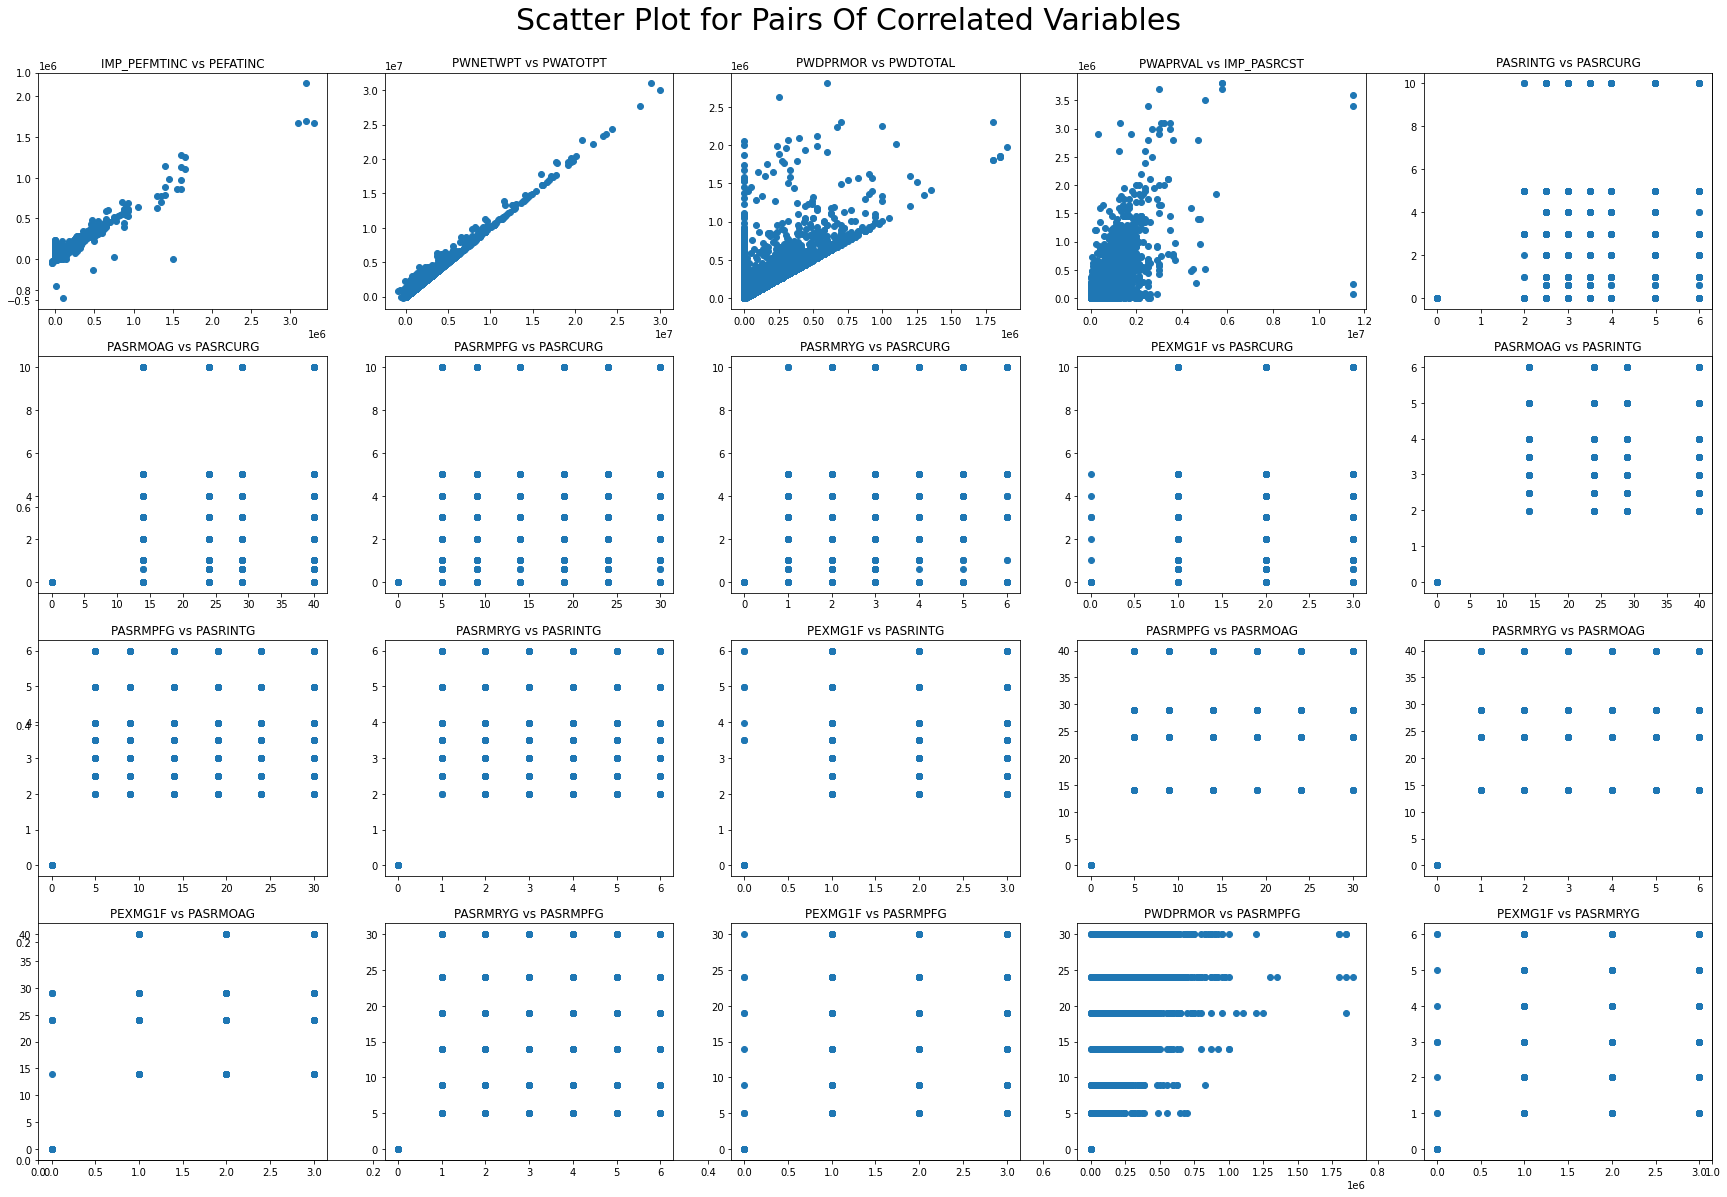

In [43]:
# Correlation Plots
fig=plt.figure(figsize=(30,20))
plt.text(x=0.5, y=0.91, s="Scatter Plot for Pairs Of Correlated Variables", fontsize=30, ha="center", transform=fig.transFigure)
#plt.text(x=0.5, y=0.89, s= "Before Dropping Correlated Variables", fontsize=18, ha="center", transform=fig.transFigure)
for i in correlated_unique.index:
    ax='ax'+str(i)
    ax=fig.add_subplot(4,5,i)
    var1title=(correlated_unique.loc[i,'Variable 1'])
    var2title=(correlated_unique.loc[i,'Variable 2'])
    ax.set_title(f'{var1title} vs {var2title}')
    ax.plot(data[correlated_unique.loc[i,'Variable 1']], data[correlated_unique.loc[i,'Variable 2']],'o')
plt.show()

In [44]:
# Dropping variables and making new list: 'new_int_data'
data.drop(columns=['PWATOTPT','IMP_PASRCST','PASRINTG','PASRMOAG','PASRMPFG','IMP_PEFMTINC','PASRMRYG','PWDPRMOR','PEXMG1F'],inplace=True)
dropped_multcol=['PWATOTPT','IMP_PASRCST','PASRINTG','PASRMOAG','PASRMPFG','IMP_PEFMTINC','PASRMRYG','PWDPRMOR','PEXMG1F']
new_int_data = [x for x in int_data if not x in dropped_multcol or dropped_multcol.remove(x)]

In [45]:
# Finding REMAINIG correlated variables
correlation_matrix_new_int_data=data[new_int_data].corr(method='pearson')
lst=[]
cond=correlation_matrix_new_int_data>=0.7
for col in new_int_data:
    rows = list(cond[col][cond[col]==True].index)
    for row in rows:
        lst.append((row,col))
correlated=pd.DataFrame(lst, columns=['Variable 1','Variable 2'])
correlated2=correlated[correlated['Variable 1']!=correlated['Variable 2']]
correlated_unique=correlated2[~correlated2[['Variable 1','Variable 2']].apply(frozenset, axis=1).duplicated()]
correlated_unique.reset_index(drop=True, inplace=True)
correlated_unique.index+=1
correlated_unique.sort_values(by='Variable 1').inplace=True


lstv1=[]
lstv2=[]
lst1=correlated_unique['Variable 1'].tolist()
lst2=correlated_unique['Variable 2'].tolist()
for i in lst1:
    cor1=data[i].corr(data['PATTSKP'])
    skew1=pre_eda_int_data_stats.loc[i,'skew']
    lstv1.append([cor1,skew1])
var1cor=pd.DataFrame(lstv1, columns=['Var1-Target Corr','Skew Var 1'])
for j in lst2:
    cor2=data[j].corr(data['PATTSKP'])
    skew2=pre_eda_int_data_stats.loc[j,'skew']
    lstv2.append([cor2,skew2])
var2cor=pd.DataFrame(lstv2, columns=['Var2-Target Corr','Skew Var 2'])
varcor=pd.concat([var1cor,var2cor], axis=1)
varcor.set_index(correlated_unique.index,inplace=True)
varcorfinal=pd.concat([correlated_unique,varcor],axis=1)

In [46]:
# Finding the remaining correlated variables - 
if varcorfinal['Skew Var 1'].empty:
    print('There are no additional integer correlated variables')
else:
    print(varcorfinal)

There are no additional integer correlated variables


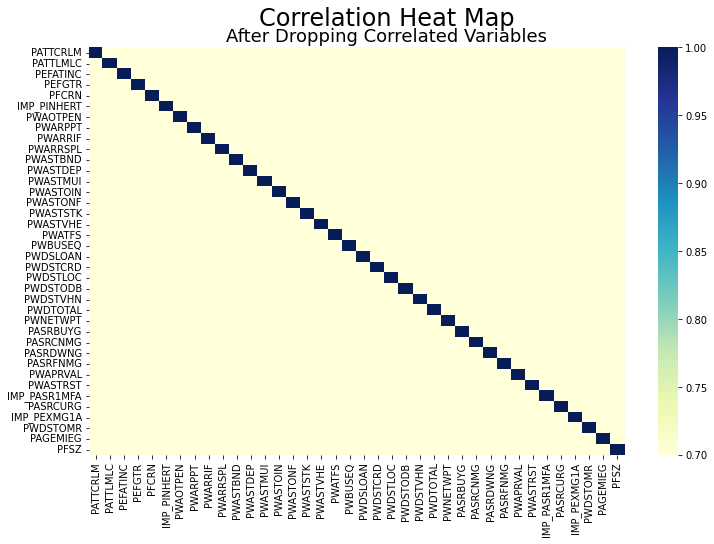

In [47]:
# Correlation Heat Map After Correlated Variables Dropped
# Correlation Heat Map
fig=plt.figure(figsize = (12,7.5))
plt.text(x=0.47, y=0.92, s="Correlation Heat Map", fontsize=24, ha="center", transform=fig.transFigure)
plt.text(x=0.47, y=0.89, s= "After Dropping Correlated Variables", fontsize=18, ha="center", transform=fig.transFigure)
sns.heatmap(correlation_matrix_new_int_data, vmin=0.7, cmap='YlGnBu')

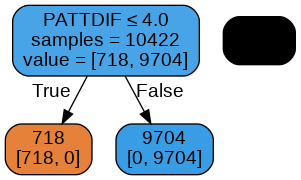

In [48]:
# Decision Tree
classTree = DecisionTreeClassifier(random_state=1, max_depth=5)
classTree.fit(data.drop(columns=['PATTSKP']),data['PATTSKP'])

plotDecisionTree(classTree,feature_names=data.columns[data.columns!='PATTSKP'])

In [49]:
# Dropping variables and making new list: 'new_cat_data'
data.drop(columns=['PASRSKP','PATTDIF','D_PWASTONF'],inplace=True)
dropped_cat_corr=['PASRSKP','PATTDIF','D_PWASTONF']
new_cat_data = [x for x in cat_data if not x in dropped_cat_corr or dropped_cat_corr.remove(x)]

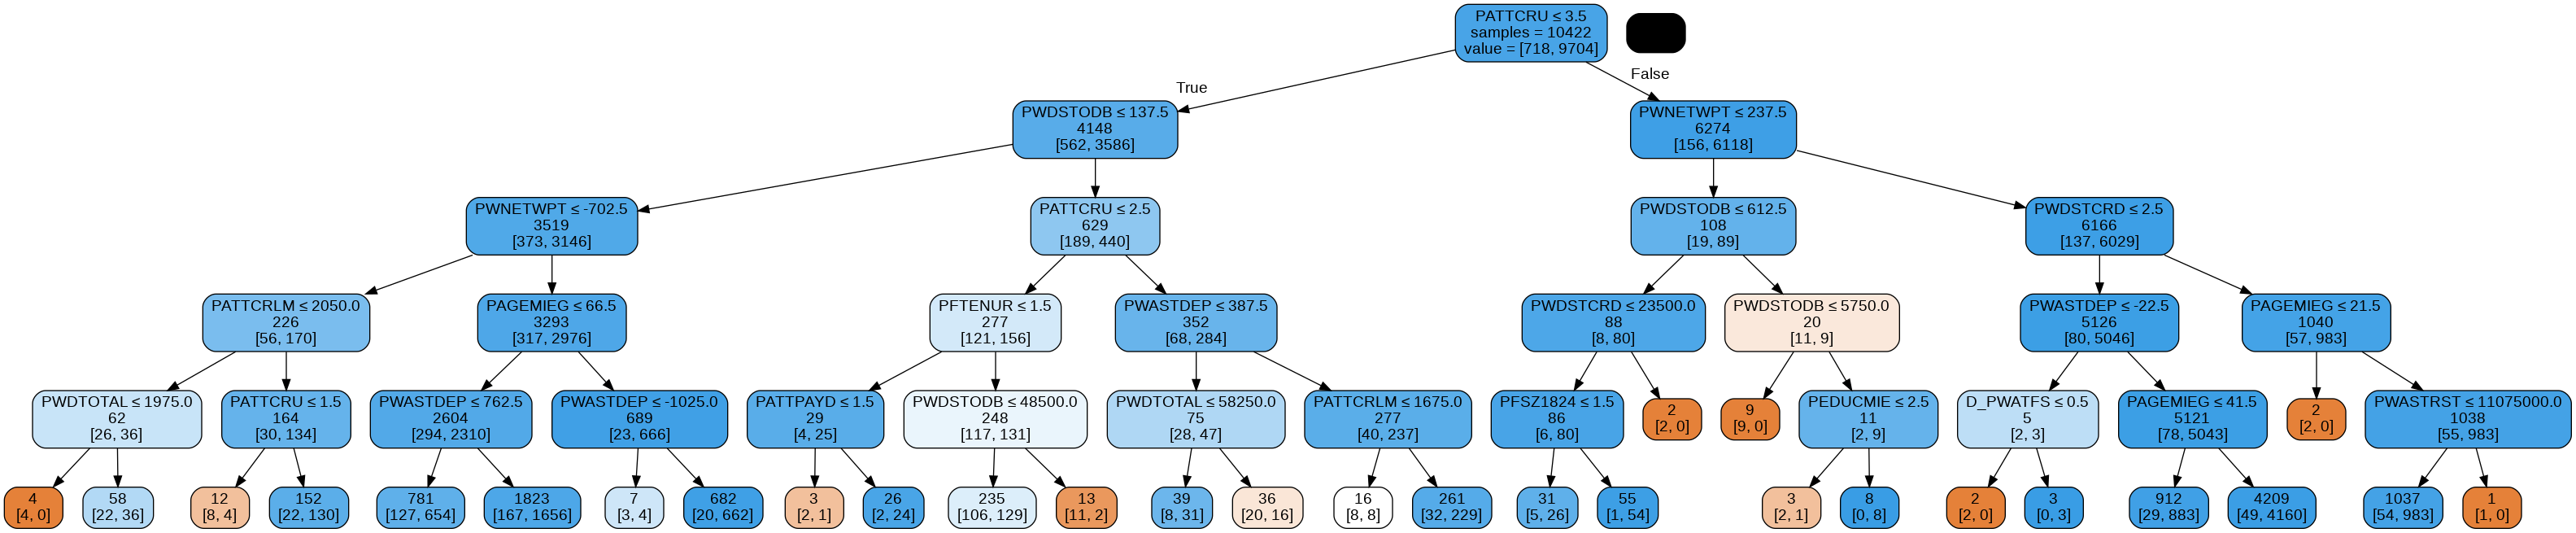

In [50]:
# Second Decision Tree
classTree = DecisionTreeClassifier(random_state=1, max_depth=5)
classTree.fit(data.drop(columns=['PATTSKP']),data['PATTSKP'])

plotDecisionTree(classTree,feature_names=data.columns[data.columns!='PATTSKP'])

In [51]:
# First Test of Independence for Categorical Variables (ChiSqure)
cor_cat_data=data[new_cat_data]

factors_paired = [(i,j) for i in cor_cat_data.columns for j in cor_cat_data.columns] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(cor_cat_data[f[0]], cor_cat_data[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
chi2=np.array(chi2).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
chi2=pd.DataFrame(chi2, index=cor_cat_data.columns, columns=cor_cat_data.columns)
p_values=np.array(p_values).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
p_values=pd.DataFrame(p_values, index=cor_cat_data.columns, columns=cor_cat_data.columns)

correlation_matrix_cat_data=p_values
lst=[]
cond=correlation_matrix_cat_data>=0.05
for col in new_cat_data:
    rows = list(cond[col][cond[col]==True].index)
    for row in rows:
        lst.append((row,col))
correlated=pd.DataFrame(lst, columns=['Var1','Var2'])
correlated2=correlated[correlated['Var1']!=correlated['Var2']]
cat_correlated_unique=correlated2[~correlated2[['Var1','Var2']].apply(frozenset, axis=1).duplicated()]
correlated_unique.reset_index(inplace=True, drop=True)
cat_correlated_unique.sort_values(by='Var1').inplace=True
cat_correlated_unique

lstv1=[]
lstv2=[]
lst1=cat_correlated_unique.Var1.tolist()
lst2=cat_correlated_unique.Var2.tolist()
for i in lst1:
    cor1=data[i].corr(data['PATTSKP'])
    lstv1.append([cor1])
var1cor=pd.DataFrame(lstv1, columns=['Var1'])
for j in lst2:
    cor2=data[j].corr(data['PATTSKP'])
    lstv2.append([cor2])
var2cor=pd.DataFrame(lstv2, columns=['Var2'])
varcor=pd.concat([var1cor,var2cor], axis=1)
varcor.set_index(cat_correlated_unique.index,inplace=True)
cat_var_cor=pd.concat([cat_correlated_unique,varcor],axis=1)
cat_var_cor.reset_index(inplace=True, drop=True)

In [52]:
# Printing pairs of non-independent categorical variables
if cat_var_cor['Var1'].empty:
    print('There are no additional non-independent categorical variables')
else:
    print(f'There are {len(cat_var_cor)} pairs of non-independent variables')
    print("Sample of (at least) 10 pairs and their respective correlation coefficient with the target variable")
    print(cat_var_cor.head(10))

There are 183 pairs of non-independent variables
Sample of (at least) 10 pairs and their respective correlation coefficient with the target variable
         Var1       Var2      Var1      Var2
0   D2_PEFGTR    PATTCRC  0.016074 -0.077577
1  D_PWDSLOAN    PATTCRC -0.120907 -0.077577
2    PFSZ65UP    PATTCRC -0.006336 -0.077577
3   D2_PEFGTR    PATTCRR  0.016074  0.086460
4    PFSZ1824    PATTCRR  0.023877  0.086460
5     PBUSIND  D_PATTCRU -0.001613 -0.178527
6  D_PEFATINC  D_PATTCRU -0.056990 -0.178527
7   D1_PEFGTR  D_PATTCRU -0.003157 -0.178527
8  D_PWAOTPEN  D_PATTCRU  0.027378 -0.178527
9   D_PWARPPT  D_PATTCRU  0.050004 -0.178527


In [53]:
# Dropping variables and making new list: 'new_cat_data2'
data.drop(columns=['D1_PEFGTR','PBUSIND','D2_PEFGTR','D_PASRFNMG','D_PWASTBND','PASRCON','D_PASR1MFA','D_PWAOTPEN','D_PWASTSTK','D_PASRBUYG','D_PWASTVHE','D_PASRCNMG','D_PWASTOIN','PGDRMIE','D_PEFMTINC','D_PAS1MRAG','PNBEARG','D_PINHERT','PFSZ1824','PFSZ4564','PFSZ65UP','PEDUCMIE','D_PASR1MR','PDWTYP','PPVRES','PASRINT','PASR1MR','PFSZ0017','PREGION','PFSZ2544'],inplace=True)
dropped_cat_corr2=['D1_PEFGTR','PBUSIND','D2_PEFGTR','D_PASRFNMG','D_PWASTBND','PASRCON','D_PASR1MFA','D_PWAOTPEN','D_PWASTSTK','D_PASRBUYG','D_PWASTVHE','D_PASRCNMG','D_PWASTOIN','PGDRMIE','D_PEFMTINC','D_PAS1MRAG','PNBEARG','D_PINHERT','PFSZ1824','PFSZ4564','PFSZ65UP','PEDUCMIE','D_PASR1MR','PDWTYP','PPVRES','PASRINT','PASR1MR','PFSZ0017','PREGION','PFSZ2544']
new_cat_data2 = [x for x in new_cat_data if not x in dropped_cat_corr2 or dropped_cat_corr2.remove(x)]

In [54]:
# Second Test of Independence for Categorical Variables (ChiSquare)
cor_cat_data=data[new_cat_data2]

factors_paired = [(i,j) for i in cor_cat_data.columns for j in cor_cat_data.columns] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(cor_cat_data[f[0]], cor_cat_data[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
chi2=np.array(chi2).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
chi2=pd.DataFrame(chi2, index=cor_cat_data.columns, columns=cor_cat_data.columns)
p_values=np.array(p_values).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
p_values=pd.DataFrame(p_values, index=cor_cat_data.columns, columns=cor_cat_data.columns)

correlation_matrix_cat_data=p_values
lst=[]
cond=correlation_matrix_cat_data>=0.05
for col in new_cat_data2:
    rows = list(cond[col][cond[col]==True].index)
    for row in rows:
        lst.append((row,col))
correlated=pd.DataFrame(lst, columns=['Var1','Var2'])
correlated2=correlated[correlated['Var1']!=correlated['Var2']]
cat_correlated_unique=correlated2[~correlated2[['Var1','Var2']].apply(frozenset, axis=1).duplicated()]
correlated_unique.reset_index(inplace=True, drop=True)
cat_correlated_unique.sort_values(by='Var1').inplace=True
cat_correlated_unique

lstv1=[]
lstv2=[]
lst1=cat_correlated_unique.Var1.tolist()
lst2=cat_correlated_unique.Var2.tolist()
for i in lst1:
    cor1=data[i].corr(data['PATTSKP'])
    lstv1.append([cor1])
var1cor=pd.DataFrame(lstv1, columns=['Var1'])
for j in lst2:
    cor2=data[j].corr(data['PATTSKP'])
    lstv2.append([cor2])
var2cor=pd.DataFrame(lstv2, columns=['Var2'])
varcor=pd.concat([var1cor,var2cor], axis=1)
varcor.set_index(cat_correlated_unique.index,inplace=True)
cat_var_cor=pd.concat([cat_correlated_unique,varcor],axis=1)
cat_var_cor.reset_index(inplace=True, drop=True)

In [55]:
# Printing remaining non-independent categorical variables
if cat_var_cor['Var1'].empty:
    print('There are no additional non-independent categorical variables')
else:
    print(f'There are {len(cat_var_cor)} remaining pairs of non-independent variables')
    print("Sample of (at least) 10 pairs and their respective correlation coefficient with the target variable")
    print(cat_var_cor.head(10))

There are 16 remaining pairs of non-independent variables
Sample of (at least) 10 pairs and their respective correlation coefficient with the target variable
         Var1        Var2      Var1      Var2
0  D_PWDSLOAN     PATTCRC -0.120907 -0.077577
1  D_PEFATINC   D_PATTCRU -0.056990 -0.178527
2   D_PWARPPT   D_PATTCRU  0.050004 -0.178527
3  D_PWDSLOAN     PATTLCR -0.120907 -0.055271
4  D_PEFATINC    PATTPAYD -0.056990  0.156384
5  D_PWASTDEP    PATTSTIN  0.109273  0.063113
6  D_PWDSLOAN  D_PEFATINC -0.120907 -0.056990
7  D_PWDSTODB  D_PEFATINC -0.206693 -0.056990
8  D_PWDSLOAN  D_PWASTDEP -0.120907  0.109273
9  D_PWDSTVHN  D_PWASTDEP -0.055594  0.109273


In [56]:
# Dropping remaining variables and making new list: 'new_cat_data3'
data.drop(columns=['D_PEFATINC','D_PWATFS','D_PWATFS','D_PEFATINC','D_PWARPPT','D_PEFATINC','PATTCRC','D_PEFATINC','D_PWDSTVHN','PATTLCR','D_PWASTDEP','D_PWDTOTAL'],inplace=True)
dropped_cat_corr3=['D_PEFATINC','D_PWATFS','D_PWATFS','D_PEFATINC','D_PWARPPT','D_PEFATINC','PATTCRC','D_PEFATINC','D_PWDSTVHN','PATTLCR','D_PWASTDEP','D_PWDTOTAL']
new_cat_data3 = [x for x in new_cat_data2 if not x in dropped_cat_corr3 or dropped_cat_corr3.remove(x)]

In [57]:
# Third Test of Independence for Categorical Variables (ChiSquare)
cor_cat_data=data[new_cat_data3]

factors_paired = [(i,j) for i in cor_cat_data.columns for j in cor_cat_data.columns] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(cor_cat_data[f[0]], cor_cat_data[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
chi2=np.array(chi2).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
chi2=pd.DataFrame(chi2, index=cor_cat_data.columns, columns=cor_cat_data.columns)
p_values=np.array(p_values).reshape((cor_cat_data.shape[1],cor_cat_data.shape[1]))
p_values=pd.DataFrame(p_values, index=cor_cat_data.columns, columns=cor_cat_data.columns)

correlation_matrix_cat_data=p_values
lst=[]
cond=correlation_matrix_cat_data>=0.05
for col in new_cat_data3:
    rows = list(cond[col][cond[col]==True].index)
    for row in rows:
        lst.append((row,col))
correlated=pd.DataFrame(lst, columns=['Var1','Var2'])
correlated2=correlated[correlated['Var1']!=correlated['Var2']]
cat_correlated_unique=correlated2[~correlated2[['Var1','Var2']].apply(frozenset, axis=1).duplicated()]
#correlated_unique.reset_index(inplace=True)
#correlated_unique.drop(columns=['index'], inplace=True)
#correlated_unique.index+=1
cat_correlated_unique.sort_values(by='Var1').inplace=True
cat_correlated_unique

lstv1=[]
lstv2=[]
lst1=cat_correlated_unique.Var1.tolist()
lst2=cat_correlated_unique.Var2.tolist()
for i in lst1:
    cor1=data[i].corr(data['PATTSKP'])
    lstv1.append([cor1])
var1cor=pd.DataFrame(lstv1, columns=['Var1'])
for j in lst2:
    cor2=data[j].corr(data['PATTSKP'])
    lstv2.append([cor2])
var2cor=pd.DataFrame(lstv2, columns=['Var2'])
varcor=pd.concat([var1cor,var2cor], axis=1)
varcor.set_index(cat_correlated_unique.index,inplace=True)
cat_var_cor=pd.concat([cat_correlated_unique,varcor],axis=1)
cat_var_cor.reset_index(inplace=True, drop=True)

In [58]:
# Printing additional non-independent categorical variables
if cat_var_cor['Var1'].empty:
    print('There are no additional non-independent categorical variables')
else:
    print(f'There are {len(cat_var_cor)} pairs of non-independent variables')
    print("Sample of 10 pairs and their respective correlation coefficient with the target variable")
    print(cat_var_cor.head(5))

There are no additional non-independent categorical variables


In [59]:
# Descriptive Statistics for High-Quality Categorical Variables

eda_cat_data3=pd.DataFrame({
'median':(data[new_cat_data3].median(axis=0)).round(2),
'mode':data[new_cat_data3].value_counts().idxmax(),
'min':(data[new_cat_data3].min(axis=0)).round(),
'max':data[new_cat_data3].max(axis=0),
'null values':data[new_cat_data3].isnull().sum()},index=new_cat_data3)

# Creating the 'Percentage Mode','Percentage least common value', and 'Count'
cols=['% - mode','% - least common value','number of classes']
lst=[]
for i in data[new_cat_data3]:
    percentage=(data[i].value_counts(normalize=True)).max()*100
    percentage2=(data[i].value_counts(normalize=True)).min()*100
    count=(data[i].value_counts()).count()
    lst.append([percentage,percentage2,count])
class_dist=pd.DataFrame(lst, columns=cols, index=new_cat_data3)

eda_cat_data_stats=pd.concat([eda_cat_data3,class_dist], axis=1)

eda_cat_data_stats['% - mode']=(eda_cat_data_stats['% - mode']).round(2)
eda_cat_data_stats['% - least common value']=(eda_cat_data_stats['% - least common value']).round(2)

eda_cat_data_stats.sort_values(by=['% - mode'], ascending=False, inplace=True)
eda_cat_data_stats

,median,mode,min,max,null values,% - mode,% - least common value,number of classes
PATTPAYD,2.0,2,1,2,0,97.62,2.38,2
D1_PWNETWPT,0.0,0,0,1,0,95.38,4.62,2
D_PWDSTODB,0.0,0,0,1,0,91.25,8.75,2
PATTCRR,6.0,2,1,6,0,90.92,1.78,3
D_PWATOTPT,0.0,1,0,1,0,89.99,10.01,2
D2_PWNETWPT,0.0,1,0,1,0,89.97,10.03,2
D_PWDSLOAN,0.0,0,0,1,0,89.25,10.75,2
D_PWARRIF,0.0,0,0,1,0,87.45,12.55,2
D_PWASTMUI,0.0,0,0,1,0,86.73,13.27,2
PATTRSP,1.0,2,1,2,0,71.76,28.24,2


SKEWNESS

In [60]:
# Descriptive Statistics for Non-Correlated Integer Variables
eda_int_data_stats=pd.DataFrame({
'std dev':(data[new_int_data].std(axis=0)).round(2),
'mean':(data[new_int_data].mean(axis=0)).round(2),
'min':(data[new_int_data].min(axis=0)).round(),
'max':data[new_int_data].max(axis=0),
'skew':(data[new_int_data].skew(axis=0)).round(2),
'kurtosis':(data[new_int_data].kurtosis(axis=0)).round(2),
'null values':data[new_int_data].isnull().sum()}, )
eda_int_data_stats.sort_values(by=['skew'], ascending=False)

,std dev,mean,min,max,skew,kurtosis,null values
PWASTSTK,429036.85,39434.71,1.0,16250000.0,25.93,842.01,0
PWASTBND,34303.47,2049.53,0.0,1100000.0,24.82,687.50,0
PWASTOIN,124658.80,13665.23,0.0,4600000.0,24.51,759.31,0
PWASTMUI,442391.02,49345.34,0.0,15750000.0,22.86,687.79,0
PWARRIF,197212.37,29524.19,0.0,7250000.0,21.44,657.24,0
PWDSTODB,16624.55,1806.94,0.0,500000.0,20.04,490.55,0
PWAOTPEN,42875.86,4337.22,0.0,1300000.0,18.11,405.17,0
PWASTRST,529246.43,108198.70,0.0,17250000.0,17.12,452.12,0
IMP_PASR1MFA,6400.61,1006.60,0.0,140000.0,11.47,172.30,0
IMP_PEXMG1A,940.41,367.61,0.0,24000.0,10.74,199.06,0


In [61]:
#Exclusion of households with the highest wealth (across multiple dimensions)
data=data[
#Net worth
(data['PWNETWPT']<=(data['PWNETWPT'].mean()+((data['PWNETWPT'].std())*1.5))) &
#Assets - Tangible-non-realestate
(data['PWASTVHE']<=(data['PWASTVHE'].mean()+((data['PWASTVHE'].std())*3))) &
#Real estate & mortgage
(data['PWASTRST']<=(data['PWASTRST'].mean()+((data['PWASTRST'].std())*3))) & 
(data['PWAPRVAL']<=(data['PWAPRVAL'].mean()+((data['PWAPRVAL'].std())*3))) &
(data['IMP_PASR1MFA']<=(data['IMP_PASR1MFA'].mean()+((data['IMP_PASR1MFA'].std())*3))) &
#Income
(data['IMP_PINHERT']<=(data['IMP_PINHERT'].mean()+((data['IMP_PINHERT'].std())*3)))&
(data['PEFATINC']<=(data['PEFATINC'].mean()+((data['PEFATINC'].std())*3))) &
#Funds
(data['PWASTSTK']<=(data['PWASTSTK'].mean()+((data['PWASTSTK'].std())*1.5)))&
(data['PWASTBND']<=(data['PWASTBND'].mean()+((data['PWASTBND'].std())*1.5)))&
(data['PWASTOIN']<=(data['PWASTOIN'].mean()+((data['PWASTOIN'].std())*1.5))) &
(data['PWASTMUI']<=(data['PWASTMUI'].mean()+((data['PWASTMUI'].std())*1.5))) &
(data['PWARRIF']<=(data['PWARRIF'].mean()+((data['PWARRIF'].std())*1.5))) &
(data['PWAOTPEN']<=(data['PWAOTPEN'].mean()+((data['PWAOTPEN'].std())*1.5))) &
#Lines of credit
(data['PWDSTLOC']<=(data['PWDSTLOC'].mean()+((data['PWDSTLOC'].std())*3))) &
#Business Equity
(data['PWBUSEQ']<=(data['PWBUSEQ'].mean()+((data['PWBUSEQ'].std())*3))) &
#Debt
(data['PWDSTODB']<=(data['PWDSTODB'].mean()+((data['PWDSTODB'].std())*1.5)))]

In [62]:
#Cap and Floor at 3 Standard Deviations
for i in new_int_data:
    data[i]=np.clip(data[i],data[i].mean()+((data[i].std())*-3),data[i].mean()+((data[i].std())*3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# Descriptive Statistics for Non-Correlated Integer Variables - After CAP
eda_capped_data=pd.DataFrame({
'std dev':(data[new_int_data].std(axis=0)).round(2),
'mean':(data[new_int_data].mean(axis=0)).round(2),
'min':(data[new_int_data].min(axis=0)).round(),
'max':data[new_int_data].max(axis=0),
'skew':(data[new_int_data].skew(axis=0)).round(2),
'kurtosis':(data[new_int_data].kurtosis(axis=0)).round(2),
'null values':data[new_int_data].isnull().sum()})
succesful_capping=eda_capped_data[(eda_capped_data['skew']<=1)&(eda_capped_data['skew']>=-1)].index.tolist()
eda_capped_data.sort_values(by=['skew'], ascending=False)


,std dev,mean,min,max,skew,kurtosis,null values
PWASTBND,607.74,70.78,0.0,6.363476e+03,9.41,90.02,0
PWAOTPEN,2374.87,450.39,0.0,1.548467e+04,5.62,30.93,0
PWASTSTK,16454.22,3374.43,1.0,1.134093e+05,5.61,31.80,0
PWBUSEQ,77741.52,16347.99,-290000.0,4.839528e+05,5.07,26.20,0
PASRFNMG,0.15,0.03,0.0,7.812226e-01,4.74,20.46,0
IMP_PASR1MFA,1121.70,256.06,0.0,6.427184e+03,4.72,21.53,0
PWASTMUI,31187.92,7465.63,0.0,1.811407e+05,4.68,21.42,0
PWDSTODB,1434.97,333.61,0.0,8.050404e+03,4.66,20.84,0
PWDSTOMR,45460.33,10686.56,0.0,2.568073e+05,4.51,19.57,0
PWDSLOAN,5938.70,1713.22,0.0,3.177949e+04,3.93,15.15,0


In [64]:
#Skew after slice
print('mean skew before cap:',eda_int_data_stats['skew'].mean())
print('max skew before cap:',eda_int_data_stats['skew'].max())
print('mean skew after cap:',eda_capped_data['skew'].mean())
print('max skew after cap:',eda_capped_data['skew'].max())

mean skew before cap: 8.973947368421054
max skew before cap: 25.93
mean skew after cap: 2.897631578947369
max skew after cap: 9.41


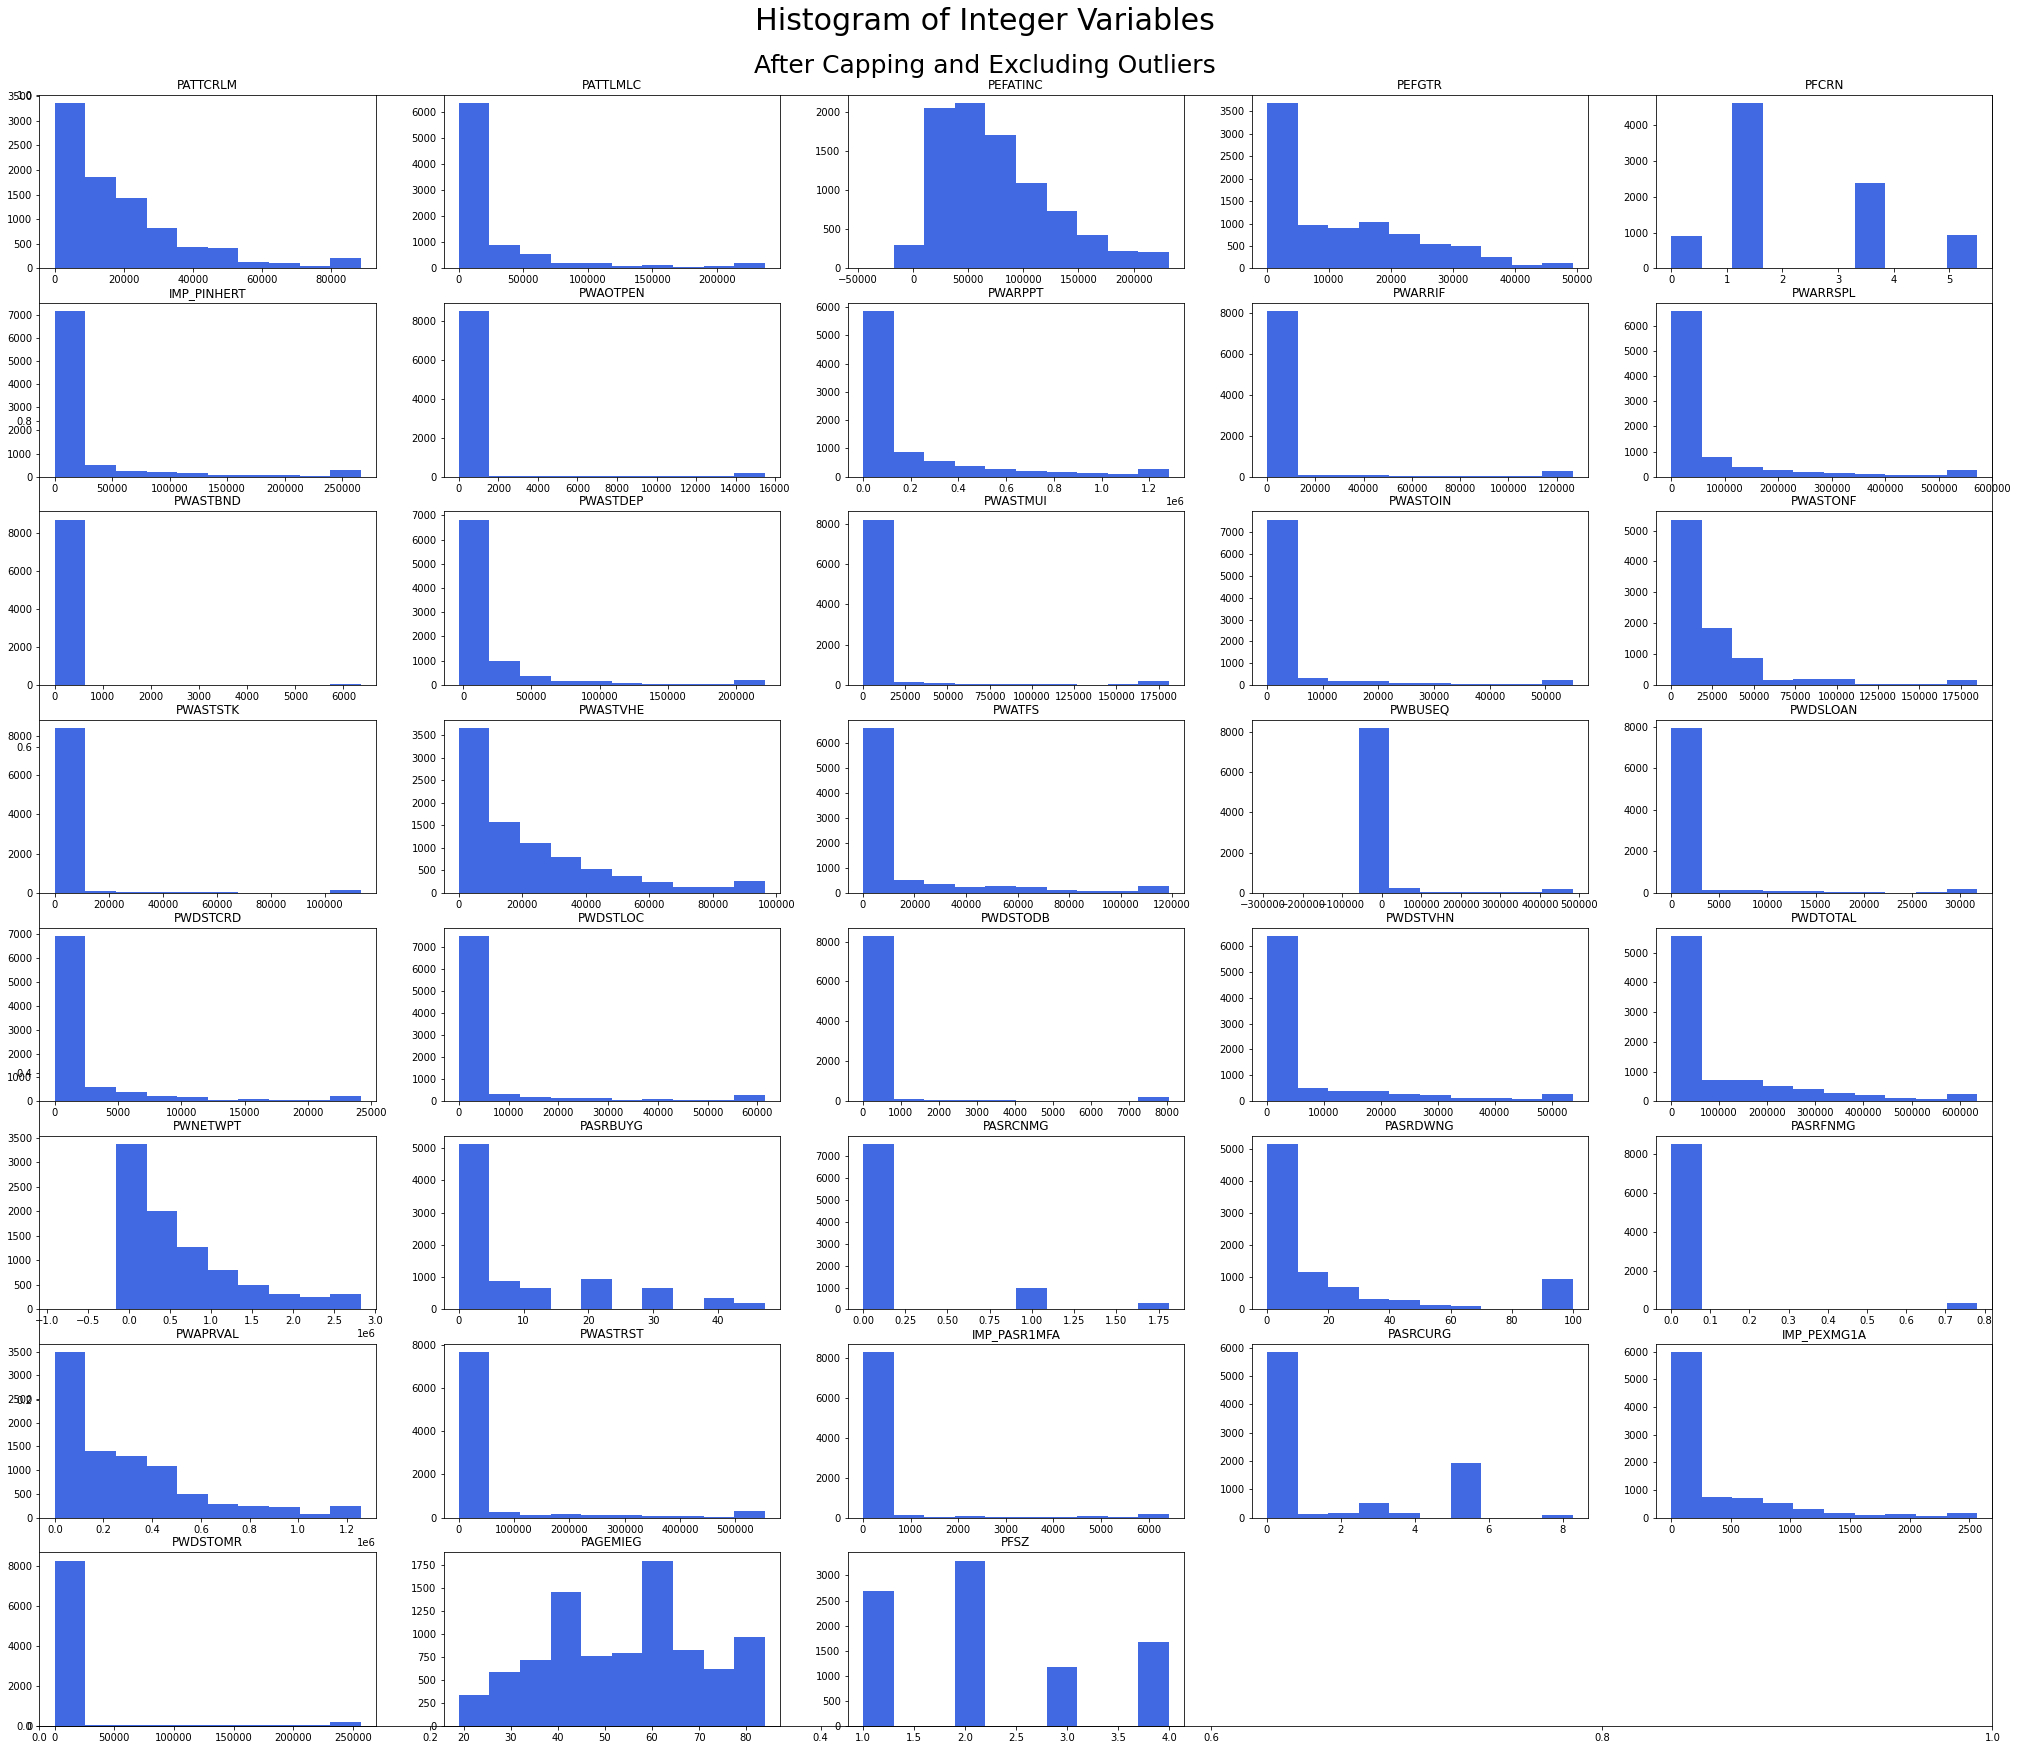

In [65]:
# Correlation Plots
fig=plt.figure(figsize=(35,30))
plt.text(x=0.5, y=0.91, s="Histogram of Integer Variables", fontsize=30, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s= "After Capping and Excluding Outliers", fontsize=25, ha="center", transform=fig.transFigure)
plot=1
for i in new_int_data:
    ax='ax'+str(plot)
    ax=fig.add_subplot(8,5,plot)
    ax.set_title(f'{i}')
    ax.hist(data[i], color= "royalblue",bins=10)
    plot=plot+1
plt.show()

In [66]:
#First transformation: LOG base 2 for non-negative variables/Binning for negative variables
negatives=eda_capped_data[data[eda_capped_data.index].min()<0].index.tolist()
lst_log_added_1=[]
lst_bin_added_1=[]
for i in eda_capped_data.index:
    if i not in negatives:
        if eda_capped_data.loc[i,'skew']>1.0:
            data['LOG_1_'+str(i)]=np.log2(data.loc[:,i]+1)
            lst_log_added_1.append(i)
    elif i in negatives:
        data['BIN_1_'+str(i)]=pd.qcut(data.loc[:,i], q=100, duplicates='drop', labels=False)
        lst_bin_added_1.append(i)

added_log=['LOG_1_'+i for i in lst_log_added_1]
added_bin=['BIN_1_'+i for i in lst_bin_added_1]
transformed_data_1=added_log+added_bin

In [67]:
# Descriptive Statistics For Transformed Data 1
eda_transformed_data_1=pd.DataFrame({
'std dev':(data[transformed_data_1].std(axis=0)).round(2),
'mean':(data[transformed_data_1].mean(axis=0)).round(2),
'min':(data[transformed_data_1].min(axis=0)).round(),
'max':data[transformed_data_1].max(axis=0),
'skew':(data[transformed_data_1].skew(axis=0)).round(2),
'kurtosis':(data[transformed_data_1].kurtosis(axis=0)).round(2),
'null values':data[transformed_data_1].isnull().sum()})
successful_transformation_1=eda_transformed_data_1[(eda_transformed_data_1['skew']<=1)&(eda_transformed_data_1['skew']>=-1)].index.tolist()
unsuccessful_transformation_1=eda_transformed_data_1[(eda_transformed_data_1['skew']>=1)|(eda_transformed_data_1['skew']<=-1)].index.tolist()
#eda_transformed_data_1[(eda_transformed_data_1['skew']<=1)&(eda_transformed_data_1['skew']>=-1)].sort_values(by=['skew'], ascending=False)
eda_transformed_data_1.sort_values(by=['skew'], ascending=False)

,std dev,mean,min,max,skew,kurtosis,null values
LOG_1_PWASTBND,1.58,0.23,0.0,12.635826,7.03,48.32,0
LOG_1_PASRFNMG,0.16,0.03,0.0,0.832868,4.74,20.46,0
LOG_1_PWAOTPEN,2.76,0.63,0.0,13.918646,4.21,16.05,0
LOG_1_IMP_PASR1MFA,2.91,0.79,0.0,12.650195,3.47,10.23,0
LOG_1_PWDSTOMR,4.26,1.15,0.0,17.970332,3.47,10.09,0
LOG_1_PWDSTODB,3.10,0.90,0.0,12.975025,3.24,8.76,0
LOG_1_PWASTSTK,3.63,2.07,1.0,16.791192,3.23,8.77,0
BIN_1_PWBUSEQ,2.37,0.79,0.0,11.000000,3.20,9.23,0
LOG_1_PWASTMUI,4.57,1.50,0.0,17.466760,2.79,5.99,0
LOG_1_PWARRIF,4.71,1.58,0.0,16.951576,2.69,5.36,0


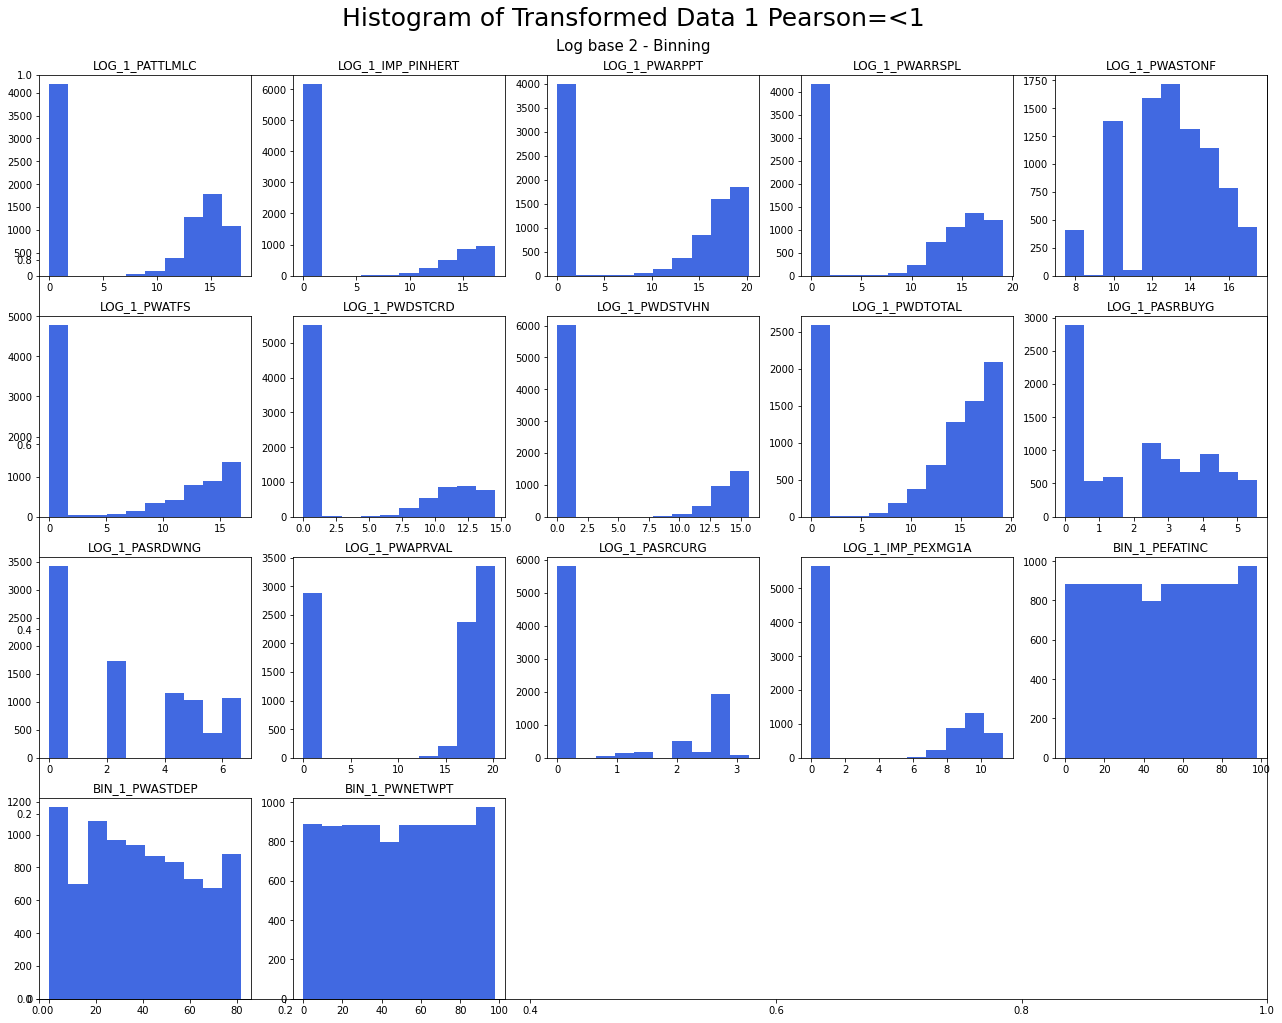

In [68]:
# Plotting of Transformed Data 1
fig=plt.figure(figsize=(22,17))
plt.text(x=0.5, y=0.92, s="Histogram of Transformed Data 1 Pearson=<1", fontsize=25, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s= "Log base 2 - Binning", fontsize=15, ha="center", transform=fig.transFigure)
plot=1
for i in data[successful_transformation_1]:
    ax='ax'+str(plot)
    ax=fig.add_subplot(4,5,plot)
    ax.set_title(f'{i}')
    ax.hist(data[i], color= "royalblue",bins=10)
    plot=plot+1
plt.show()

In [69]:
#Second transformation: Binning for Unsuccessful Transformations 1
negatives=eda_transformed_data_1[data[eda_transformed_data_1.index].min()<0].index.tolist()
var_unsuccessful_transformation_1=[s.replace('LOG_1_','').replace('BIN_1_','') for s in unsuccessful_transformation_1]

lst_bin_added_2=[]
for i in var_unsuccessful_transformation_1:
    if i not in negatives:
        data['BIN_2_'+str(i)]=pd.qcut(data.loc[:,i], q=100, duplicates='drop', labels=False)
        lst_bin_added_2.append(i)
    else:
        pass

lst_bin_added_2=['BIN_2_'+i for i in lst_bin_added_2]
transformed_data_2=lst_bin_added_2

In [70]:
# Descriptive Statistics for Non-Correlated Integer Variables - After CAP
eda_transformed_data_2=pd.DataFrame({
'std dev':(data[transformed_data_2].std(axis=0)).round(2),
'mean':(data[transformed_data_2].mean(axis=0)).round(2),
'min':(data[transformed_data_2].min(axis=0)).round(),
'max':data[transformed_data_2].max(axis=0),
'skew':(data[transformed_data_2].skew(axis=0)).round(2),
'kurtosis':(data[transformed_data_2].kurtosis(axis=0)).round(2),
'null values':data[transformed_data_2].isnull().sum()})

successful_transformation_2=eda_transformed_data_2[(eda_transformed_data_2['skew']<=1)&(eda_transformed_data_2['skew']>=-1)].index.tolist()
unsuccessful_transformation_2=eda_transformed_data_2[(eda_transformed_data_2['skew']>=1)|(eda_transformed_data_2['skew']<=-1)].index.tolist()

eda_transformed_data_2.sort_values(by=['kurtosis'], ascending=False)

,std dev,mean,min,max,skew,kurtosis,null values
BIN_2_PWASTBND,0.22,0.03,0,2,7.90,63.74,0
BIN_2_PASRCNMG,0.18,0.03,0,1,5.25,25.53,0
BIN_2_PWAOTPEN,0.66,0.14,0,4,5.00,24.33,0
BIN_2_PWDSTOMR,0.87,0.20,0,5,4.59,20.36,0
BIN_2_PWDSTODB,0.99,0.25,0,5,4.10,15.63,0
BIN_2_IMP_PASR1MFA,0.99,0.25,0,5,4.09,15.56,0
BIN_2_PWASTSTK,1.33,0.35,0,7,4.00,15.18,0
BIN_2_PWASTMUI,1.47,0.42,0,7,3.65,12.20,0
BIN_2_PWARRIF,1.74,0.52,0,8,3.45,10.70,0
BIN_2_PWDSLOAN,2.10,0.65,0,10,3.37,10.33,0


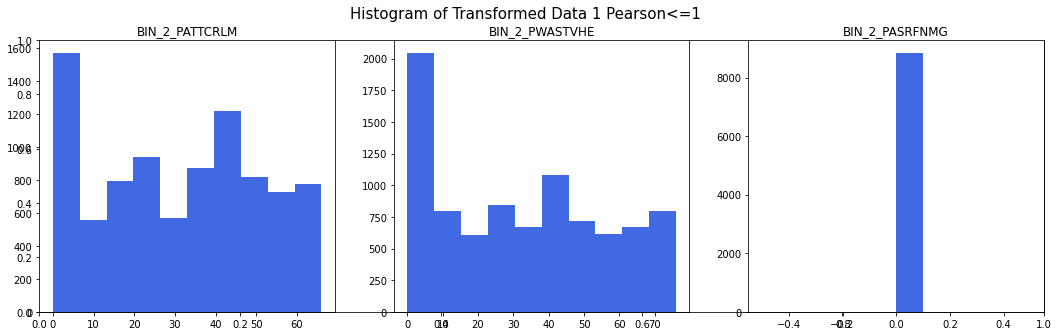

In [71]:
# Plotting of Transformed Data 2
fig=plt.figure(figsize=(18,5))
plt.text(x=0.5, y=0.94, s="Histogram of Transformed Data 1 Pearson<=1", fontsize=15, ha="center", transform=fig.transFigure)
#plt.text(x=0.5, y=0.92, s= "Binning", fontsize=12, ha="center", transform=fig.transFigure)
plot=1
for i in data[successful_transformation_2]:
    ax='ax'+str(plot)
    ax=fig.add_subplot(1,3,plot)
    ax.set_title(f'{i}')
    ax.hist(data[i], color= "royalblue",bins=10)
    plot=plot+1
plt.show()

In [72]:
# Descriptive Statistics For Integer FINAL Data

int_data_final=successful_transformation_1+succesful_capping+successful_transformation_2
transformed_data_final=successful_transformation_1+successful_transformation_2

eda_transformed_data_final=pd.DataFrame({
'std dev':(data[transformed_data_final].std(axis=0)).round(2),
'mean':(data[transformed_data_final].mean(axis=0)).round(2),
'min':(data[transformed_data_final].min(axis=0)).round(),
'max':data[transformed_data_final].max(axis=0),
'skew':(data[transformed_data_final].skew(axis=0)).round(2),
'kurtosis':(data[transformed_data_final].kurtosis(axis=0)).round(2),
'null values':data[transformed_data_final].isnull().sum()})
eda_transformed_data_final.sort_values(by=['skew'], ascending=False)


,std dev,mean,min,max,skew,kurtosis,null values
LOG_1_IMP_PINHERT,7.05,4.58,0.0,18.022925,0.95,-1.00,0
LOG_1_PWDSTVHN,6.55,4.46,0.0,15.714750,0.81,-1.29,0
LOG_1_PASRCURG,1.15,0.81,0.0,3.214518,0.80,-1.25,0
LOG_1_IMP_PEXMG1A,4.56,3.40,0.0,11.324999,0.64,-1.52,0
LOG_1_PWDSTCRD,5.70,4.33,0.0,14.560529,0.64,-1.45,0
LOG_1_PWATFS,6.93,6.14,0.0,16.857609,0.35,-1.71,0
LOG_1_PASRDWNG,2.41,2.67,0.0,6.658211,0.19,-1.38,0
BIN_2_PWASTVHE,24.19,32.13,0.0,76.000000,0.17,-1.22,0
LOG_1_PASRBUYG,1.93,2.26,0.0,5.592172,0.13,-1.46,0
BIN_1_PWASTDEP,24.11,38.40,0.0,82.000000,0.12,-1.10,0


In [73]:
#Dropping Unsuccessful Transformations
data.drop(columns=unsuccessful_transformation_1,inplace=True)
data.drop(columns=unsuccessful_transformation_2,inplace=True)

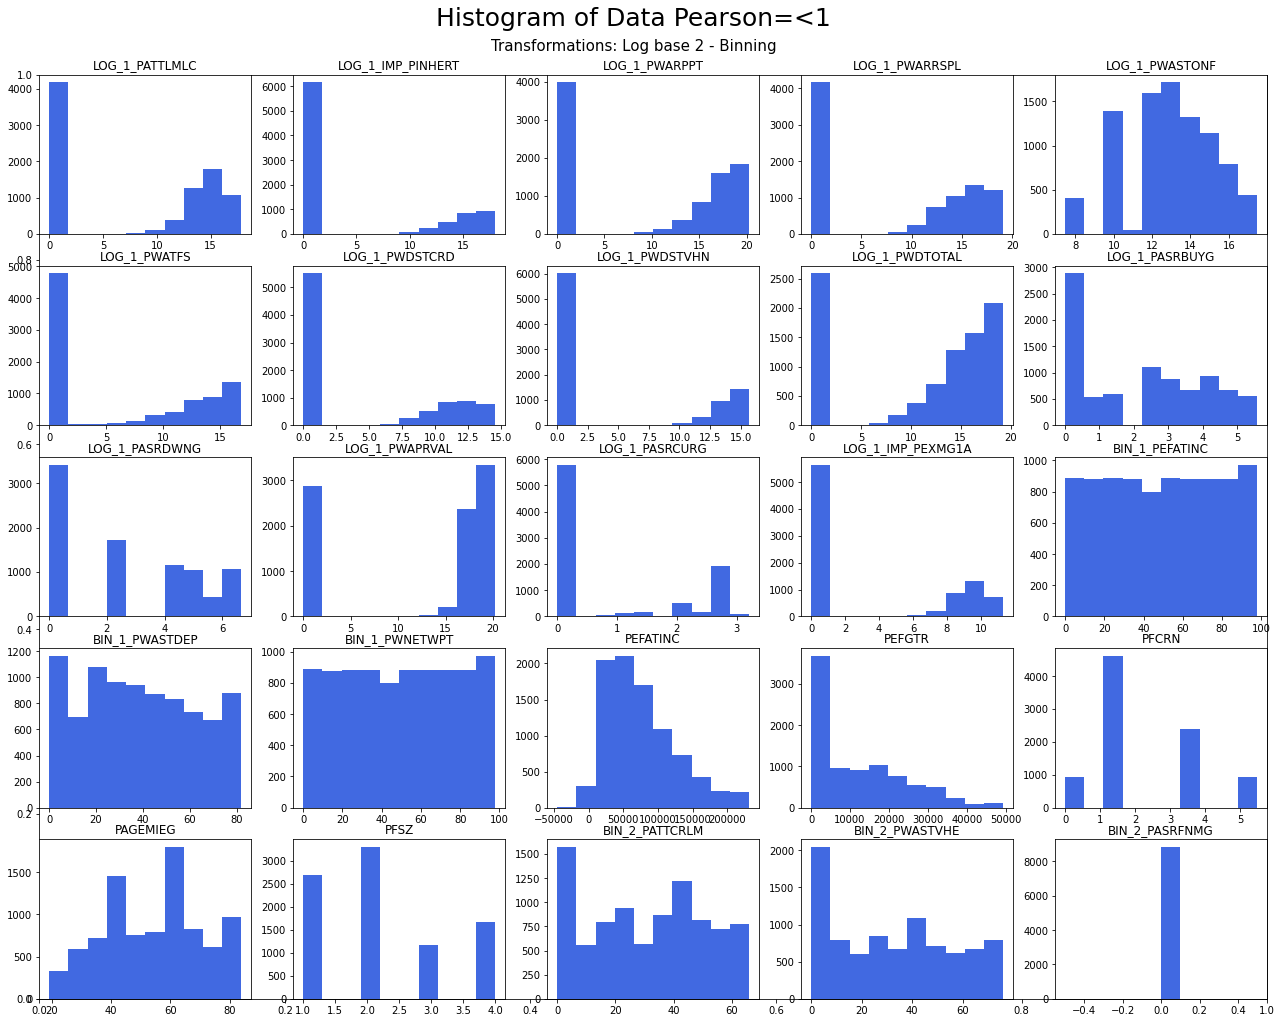

In [74]:
# Plotting of Transformed Data 1
fig=plt.figure(figsize=(22,17))
plt.text(x=0.5, y=0.92, s="Histogram of Data Pearson=<1", fontsize=25, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.90, s= "Transformations: Log base 2 - Binning", fontsize=15, ha="center", transform=fig.transFigure)
plot=1
for i in data[int_data_final]:
    ax='ax'+str(plot)
    ax=fig.add_subplot(5,5,plot)
    ax.set_title(f'{i}')
    ax.hist(data[i], color= "royalblue",bins=10)
    plot=plot+1
plt.show()

In [75]:
#data.to_csv('post_eda_data.csv')